<a href="https://colab.research.google.com/github/asishpattnaik1/CE888/blob/main/Lab2/Lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [5]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
df.head()


,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [12]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
 boot_mean = []
 bootstrap = np.random.choice(x,(n_bootstraps,sample_size))
 data_mean = np.mean(bootstrap)

 for boot in bootstrap:
  boot_mean.append(np.mean(boot))

 lower = np.percentile(boot_mean,2.5)
 upper = np.percentile(boot_mean,97.5)

 return data_mean, lower, upper
print(bootstrap_mean(data, data.shape[0], 20))

(9.142857142857142, 7.316071428571428, 11.575)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

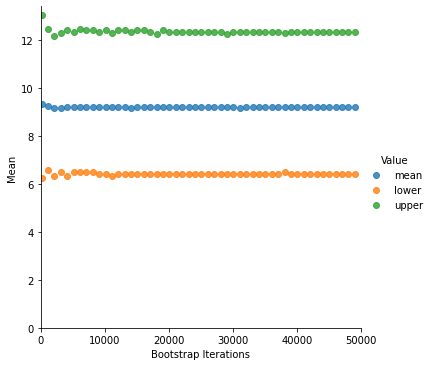

In [13]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [16]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
 boot_mean = []
 bootstrap = np.random.choice(sample, (n_bootstraps,sample_size))
 data_mean = np.mean(bootstrap)
 for boot in bootstrap:
   boot_mean.append(np.mean(boot))
 alpha = (100-ci)/2
 lower = np.percentile(boot_mean,alpha)
 upper = np.percentile(boot_mean,100-alpha)
 return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

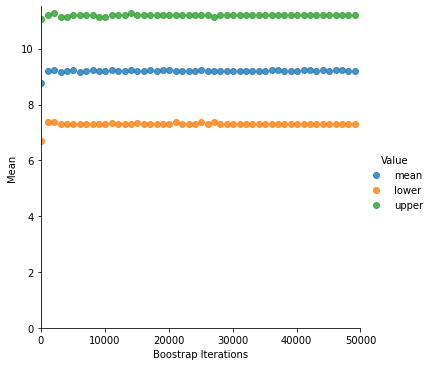

In [17]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


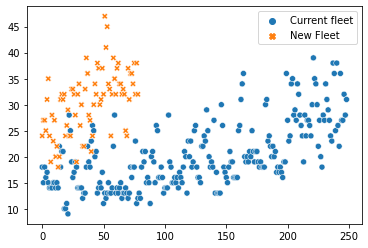

In [25]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->

df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
#data = df.values
df.head()
#sns.relplot(data = df)
#sns.lineplot(data=df)
#sns.scatterplot(data= df.iloc[:,0])
sns.scatterplot(data=df)
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [26]:
# <---INSERT YOUR CODE HERE--->

current_fleet = df.values.T[0]
new_fleet= df.values.T[1]


clean_newFleet = np.array([fleet for fleet in new_fleet if str(fleet) != 'nan'])

mean_current = np.mean(current_fleet)
mean_new = np.mean(clean_newFleet)



print(" <---- Permutation test--->")

t_obs = mean_new - mean_current  #difference of mean of origianl pair of arrays
print("Difference in mean: {}".format(t_obs))
len_1 = current_fleet.size 


tmp_currentFleet = current_fleet
tmp_newFleet = clean_newFleet

count_true = 0
for i in range(0,30000):
  tmp_data = np.hstack([tmp_currentFleet, tmp_newFleet]) 
  np.random.shuffle(tmp_data) #does not return anything. SHape 328,
  
  tmp_currentFleet = np.array(tmp_data[:len_1])  
  tmp_newFleet = np.array(tmp_data[len_1:])

  t_perm = np.mean(tmp_newFleet) - np.mean(tmp_currentFleet) #difference of mean after shuffling
  
  if t_perm > t_obs:
     count_true =count_true + 1

p_value = count_true/20000
print("p-value is: {}".format(p_value))



 <---- Permutation test--->
Difference in mean: 10.336434344974837
p-value is: 0.0


In [61]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """

    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    
    t_obs = np.mean(sample1) - np.mean(sample2)
    len_1 = sample1.size
    len_2 = sample2.size
    tmp_sample1 = sample1
    tmp_sample2 = sample2
    n_count = 0
    for i in range(0,n_permutations):
      combined_data = np.hstack([tmp_sample1,tmp_sample2])
      np.random.shuffle(combined_data) #does not return anything.
      tmp_sample1 = np.array(combined_data[:len_1])
      tmp_sample2 = np.array(combined_data[len_1:])
      t_perm = np.mean(tmp_sample2) - np.mean(tmp_sample1)
      if t_perm > t_obs:
        n_count= n_count + 1
      pvalue = n_count/n_permutations

    return pvalue

#testing with given data  
print(permut_test(np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]),np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),30000))    

0.8184333333333333


In [36]:
# <-This  code is for writing and testing with the data in class notes pdf-->#

x = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]) #x = old
y = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]) #y = new
x_mean = np.mean(x)
y_mean = np.mean(y)
t_obs_1 = y_mean - x_mean
len_1 = x.size
len_2 = y.size
print(len_1)
  
tmp_x = x
tmp_y = y
count = 0
for i in range(0,20000):
 new_data = np.hstack([tmp_x,tmp_y])
 np.random.shuffle(new_data) #does not return anything.
 tmp_x = np.array(new_data[:len_1])
 tmp_y = np.array(new_data[len_2:])
 t_perm_1 = np.mean(tmp_y) - np.mean(tmp_x)
 if t_perm_1 > t_obs_1:
     count+= 1
  
p_value = count/20000
print(p_value)

11
0.0323


Creating function for Standard deviation

In [ ]:
# bootstrap for Standard deviation 

def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):
  boot_sd = []
  bootstrap = np.random.choice(sample, (n_bootstraps,sample_size))
  data_sd = np.std(bootstrap)
  for boot in bootstrap:
     boot_sd.append(np.std(boot))
  alpha = (100-ci)/2
  lower = np.percentile(boot_sd,alpha)
  upper = np.percentile(boot_sd,100-alpha)

  return data_sd,lower,upper



Quiz question and answers

In [47]:
#Question2 - The 80% confidence interval for the mean of the customers dataset using 10000 iterations 

customer_UpperLower = bootstrap_mean_ci(data, data.shape[0], 10000, 80)

print(round(customer_UpperLower[2],2),round(customer_UpperLower[1],2))

11.21 7.29


In [52]:
#Question3 - The 80% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations
current_lowerUpper = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000,80)
current_upper = round(current_lowerUpper[2],2)
current_lower = round(current_lowerUpper[1],2)

print(current_lower,current_upper)

19.62 20.67


In [58]:
#Question4 - The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations
customer_UpperLower = bootstrap_sd_ci(data, data.shape[0], 10000, 90)

print(round(customer_UpperLower[2],2),round(customer_UpperLower[1],2))


7.12 3.04


In [60]:
#Question5 - The 99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations
current_lowerUpper = bootstrap_sd_ci(current_fleet, current_fleet.shape[0], 10000,99)
current_upper = round(current_lowerUpper[2],2)
current_lower = round(current_lowerUpper[1],2)

print(current_lower,current_upper)

5.64 7.16


In [65]:
#Question 8
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print(len(dem_share_PA), len(dem_share_OH))
share_PA = np.array(dem_share_PA)
share_OH = np.array(dem_share_OH)

#print(np.mean(share_PA), np.mean(share_OH))

#Q8: The 98% confidence intervals for the means of the votes using 100000 bootstraps:
PA_UpperLower = bootstrap_mean_ci(share_PA, share_PA.shape[0], 100000,98)
PA_upper = round(PA_UpperLower[2],2)
PA_lower = round(PA_UpperLower[1],2)

OH_UpperLower = bootstrap_mean_ci(share_OH, share_OH.shape[0], 100000,98)
OH_upper = round(OH_UpperLower[2],2)
OH_lower = round(OH_UpperLower[1],2)

print("for OH: {},{}".format(OH_upper, OH_lower))
print("for PA: {},{}".format(PA_upper, PA_lower))


#the p-value

print(round(permut_test(dem_share_PA, dem_share_OH, 30000),3))

67 88
for OH: 46.77,41.86
for PA: 48.33,42.8
0.239
